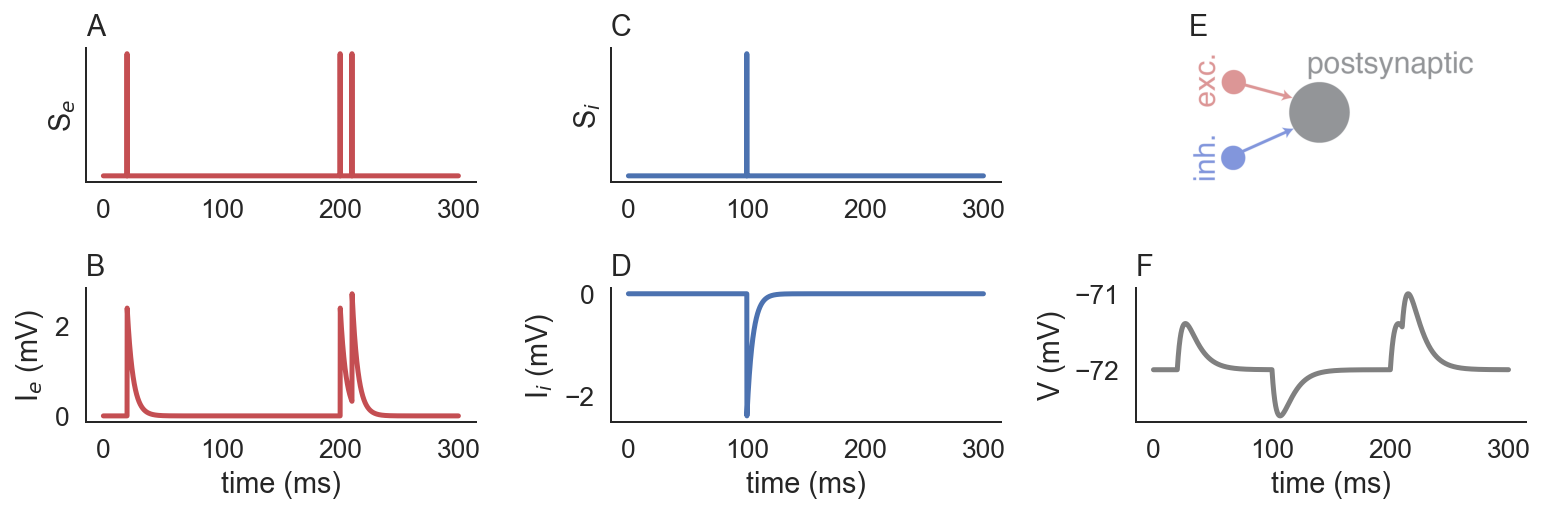

In [1]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')
%config InlineBackend.figure_format = 'retina'

###############################################
###############################################

# Discretized time
T=300
dt=.1 
time=np.arange(0,T,dt)


# Synapse parameters
taue=5 
Je=12
taui=5
Ji=-12

# Neuron parameters
EL=-72 
taum=10


# Presynaptic spike times
ExcSpikeTimes=np.array([20,200,210])
InhSpikeTimes=np.array([100])

# Binarized presynaptic spike train
Se=np.zeros_like(time)
Si=np.zeros_like(time)
Se[np.floor(ExcSpikeTimes/dt).astype(int)]=1/dt
Si[np.floor(InhSpikeTimes/dt).astype(int)]=1/dt

# External input. Set to zero.
I0=0
Ix=I0+np.zeros_like(time)


# Euler solver to compute Is and V
Ie=np.zeros_like(time)
Ii=np.zeros_like(time)
V=np.zeros_like(time)
V[0]=EL 
for i in range(len(time)-1):
    V[i+1]=V[i]+dt*(-(V[i]-EL)+Ie[i]+Ii[i]+Ix[i])/taum 
    Ie[i+1]=Ie[i]+dt*(-Ie[i]+Je*Se[i])/taue
    Ii[i+1]=Ii[i]+dt*(-Ii[i]+Ji*Si[i])/taui
    
  
# Make figure
plt.subplots(2,3,figsize=(11, 3.8))

# Raster plot
plt.subplot(2,3,1)
plt.plot(time,Se,color='r')
#plt.xlabel('time (ms)')
plt.ylabel('S$_e$')
plt.title('A',loc='left')
plt.yticks([])
sns.despine()

plt.subplot(2,3,4)
plt.plot(time,Ie,color='r')
plt.xlabel('time (ms)')
plt.ylabel('I$_e$ (mV)')
plt.title('B',loc='left')
sns.despine()


plt.subplot(2,3,2)
plt.plot(time,Si,color='b')
#plt.xlabel('time (ms)')
plt.ylabel('S$_i$')
plt.title('C',loc='left')
plt.yticks([])
sns.despine()


plt.subplot(2,3,5)
plt.plot(time,Ii,color='b')
plt.xlabel('time (ms)')
plt.ylabel('I$_i$ (mV)')
plt.title('D',loc='left')
sns.despine()


plt.subplot(2,3,3)
# Get image for plot
# Get image for plot
try: 
    im = plt.imread('../ImageFiles/Synapses.png')
except:
    try:
        url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/ImageFiles/Synapses.png"
        file = np.DataSource().open(url)
        im = plt.imread(file.name)
    except:
        im = 1.0+np.zeros([100,100,3],dtype=np.uint8)
plt.imshow(im,interpolation='hanning')
plt.axis('off')
plt.title('E',loc='left')


plt.subplot(2,3,6)
plt.plot(time,V,color='gray')
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.title('F',loc='left')


plt.tight_layout()

